In [ ]:
import pandas as pd
train = pd.read_json('train.json', lines=True)
#test = pd.read_json('test.json', lines=True)
#submission = pd.read_csv('sample_submission.csv')

print('Train shapes: ', train.shape)
#print('Test shapes: ', test.shape)

Train shapes:  (2400, 19)


# We have 2400 mRNA sequences in the training data set and 3634 mRNA sequences in the test data set. 

In [ ]:
train.head(20)

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
index,,,,,,,,,,,,,,,,,,
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."
5,id_00ab2d761,GGAAAGCGCCGCGGCGGUAGCGGCAGCGAGGAGCGCUACCAAGGCA...,.....(.(((((.(((((((((...........)))))))..(((....,EEEEESISSSSSISSSSSSSSSHHHHHHHHHHHSSSSSSSMMSSSH...,4.136,1,107,68,"[0.1942, 0.2041, 0.1626, 0.1213, 0.10590000000...","[0.2726, 0.2984, 0.2

In [ ]:
#test.head(5)

In [ ]:
#submission

In [ ]:
from collections import Counter

bases = []
for i in range(len(train)):
    counts = Counter(train.iloc[i]['sequence'])
    bases.append((counts['A'],counts['G'],counts['C'],counts['U']))
    
bases = pd.DataFrame(bases, columns=['A_percent', 'G_percent', 'C_percent', 'U_percent'])



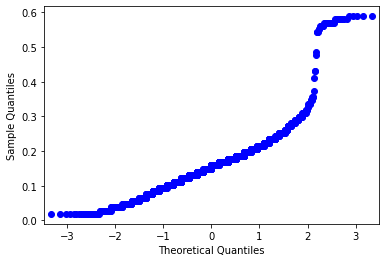

In [ ]:
#import plotly.express as px
# fig = px.bar(
    # pd.DataFrame(bases['A_percent']), 
    # x = 'A_percent', 
    # orientation = 'v', 
    # title = 'Distribution of A', 
    # height = 600, 
    # width = 800
# )
# fig.show()
#import seaborn as sns
#from scipy.stats import *
#sns.distplot(bases['U_percent'], bins='auto',fit=norm, color='purple')
#bases['U_percent'].describe()

test = shapiro(bases['U_percent'])
test
#import pylab
import statsmodels.api as sm
from matplotlib import pyplot as plt
sm.ProbPlot(bases['U_percent'], t,distargs=(1000,)).qqplot()
plt.show()

In [ ]:
pairs_rate = []

for i in range(len(train)):
    res = Counter(train.iloc[i]['structure'])
    pairs_rate.append(res['('] / (107/2))
    
pairs_rate = pd.DataFrame(pairs_rate, columns=['pairs_rate'])
pairs_rate

,pairs_rate
0,0.429907
1,0.616822
2,0.448598
3,0.598131
4,0.654206
...,...
2395,0.355140
2396,0.130841
2397,0.635514
2398,0.280374


In [ ]:
pairs = []
all_partners = []
for j in range(len(train)):
    partners = [-1 for i in range(130)]
    pairs_dict = {}
    queue = []
    for i in range(0, len(train.iloc[j]['structure'])):
        if train.iloc[j]['structure'][i] == '(':
            queue.append(i)
        if train.iloc[j]['structure'][i] == ')':
            first = queue.pop()
            try:
                pairs_dict[(train.iloc[j]['sequence'][first], train.iloc[j]['sequence'][i])] += 1
            except:
                pairs_dict[(train.iloc[j]['sequence'][first], train.iloc[j]['sequence'][i])] = 1
                
            partners[first] = i
            partners[i] = first
    
    all_partners.append(partners)
    
    pairs_num = 0
    pairs_unique = [('U', 'G'), ('C', 'G'), ('U', 'A'), ('G', 'C'), ('A', 'U'), ('G', 'U'), ('A', 'A'), ('U','U'),('G','G'),('C','C'),('C','A'),('A','G'),('G','A')]
    for item in pairs_dict:
        pairs_num += pairs_dict[item]
    add_tuple = list()
    for item in pairs_unique:
        try:
            add_tuple.append(pairs_dict[item]/pairs_num)
        except:
            add_tuple.append(0)
    pairs.append(add_tuple)
    
pairs = pd.DataFrame(pairs, columns=['U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U'])
pairs

,U-G,C-G,U-A,G-C,A-U,G-U
0,0.086957,0.130435,0.260870,0.347826,0.173913,0.000000
1,0.030303,0.363636,0.030303,0.393939,0.121212,0.060606
2,0.041667,0.208333,0.208333,0.291667,0.125000,0.125000
3,0.000000,0.437500,0.062500,0.406250,0.031250,0.062500
4,0.000000,0.000000,0.457143,0.000000,0.542857,0.000000
...,...,...,...,...,...,...
2395,0.000000,0.210526,0.263158,0.263158,0.157895,0.105263
2396,0.142857,0.000000,0.428571,0.142857,0.285714,0.000000
2397,0.000000,0.294118,0.235294,0.323529,0.147059,0.000000
2398,0.133333,0.200000,0.066667,0.400000,0.200000,0.000000


In [ ]:
train['partners'] = all_partners

In [ ]:
pairs_dict = {}
queue = []
for j in range(len(train)):
    sam = train.iloc[j]
    for i in range(0, len(sam['structure'])):
        if sam['structure'][i] == '(':
            queue.append(i)
        if sam['structure'][i] == ')':
            first = queue.pop()
            try:
                pairs_dict[(sam['sequence'][first], sam['sequence'][i])] += 1
            except:
                pairs_dict[(sam['sequence'][first], sam['sequence'][i])] = 1
                
pairs_dict

{('A', 'U'): 9961,
 ('C', 'G'): 15797,
 ('G', 'C'): 16336,
 ('G', 'U'): 2439,
 ('U', 'A'): 9955,
 ('U', 'G'): 2280}

In [ ]:
pairs_dict[('A', 'U')]+=pairs_dict[('U', 'A')]
pairs_dict[('C', 'G')]+=pairs_dict[('G', 'C')]
pairs_dict[('G', 'U')]+=pairs_dict[('U', 'G')]
pairs_dict

{('A', 'U'): 19916,
 ('C', 'G'): 32133,
 ('G', 'C'): 16336,
 ('G', 'U'): 4719,
 ('U', 'A'): 9955,
 ('U', 'G'): 2280}

In [ ]:
import plotly.express as px
names = []
values = []

for item in pairs_dict:
    names.append(item)
    values.append(pairs_dict[item])
    
df = pd.DataFrame()
df['pair'] = names
df['count'] = values
df['pair'] = df['pair'].astype(str)
df.sort_values(by=['count'])

fig = px.bar(
    df, 
    x = 'pair', 
    y = "count", 
    orientation = 'v', 
    title = 'Distribution of Pair Types', 
    height = 400, 
    width = 800
)
fig.show()

In [ ]:
loops = []
for i in range(len(train)):
    counts = Counter(train.iloc[i]['predicted_loop_type'])
    available = ['S', 'E', 'H', 'I', 'X', 'M', 'B']
    row = []
    for item in available:
        try:
            row.append(counts[item])
        except:
            row.append(0)
    loops.append(row)
    
loops = pd.DataFrame(loops, columns=available)
loops

,S,E,H,I,X,M,B
0,46,26,15,14,5,0,1
1,66,26,11,0,0,3,1
2,48,26,15,12,1,5,0
3,64,27,14,0,0,0,2
4,70,26,8,0,0,0,3
...,...,...,...,...,...,...,...
2395,38,29,23,5,12,0,0
2396,14,89,4,0,0,0,0
2397,68,26,12,0,0,1,0
2398,30,26,12,4,35,0,0


In [ ]:
#import numpy as np
#np.mean(loops['S']),np.mean(loops['E']),np.mean(loops['H'])
len(loops[loops['I']>0]),len(loops[loops['X']>0]),len(loops[loops['M']>0]),len(loops[loops['B']>0])

(1370, 1239, 717, 902)

In [ ]:
res_dict = {}
for j in range(len(train)):
    sam = train.iloc[j]
    prom = Counter(sam['predicted_loop_type'])
    for item in prom:
        try:
            res_dict[item] += prom[item]
        except:
            res_dict[item] = prom[item]
res_dict

names = []
values = []
for item in res_dict:
    names.append(item)
    values.append(res_dict[item])
    
df = pd.DataFrame()
df['Loop Type'] = names
df['Count'] = values
df.sort_values(by=['count'])

fig_loop = px.bar(
    df, 
    x = 'Loop Type', 
    y = "Count", 
    orientation = 'v', 
    title = 'Distribution of Predicted Loop Types', 
    height = 400, 
    width = 600
)
fig_loop.show()

KeyError: ignored

In [ ]:
train = pd.concat([train, bases, pairs, loops, pairs_rate], axis=1)
train

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,partners,A_percent,G_percent,C_percent,U_percent,U-G,C-G,U-A,G-C,A-U,G-U,E,S,H,B,X,I,M,pairs_rate
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000...","[-1, -1, -1, -1, -1, 24, 23, 21, 20, 19, 18, -...",0.420561,0.177570,0.214953,0.186916,0.086957,0.130435,0.260870,0.347826,0.173913,0.000000,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000,0.429907
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0...","[-1, -1, -1, -1, -1, 55, 54, 53, 52, 51, 50, 4...",0.233645,0.308411,0.299065,0.158879,0.030303,0.363636,0.030303,0.393939,0.121212,0.060606,0.242991,0.616822,0.102804,0.009346,0.000000,0.000000,0.028037,0.616822
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499...","[-1, -1, -1, -1, -1, 66, 65, 64, 63, -1, 61, 6...",0.401869,0.224299,0.186916,0.186916,0.041667,0.208333,0.208333,0.291667,0.125000,0.125000,0.242991,0.448598,0.140187,0.000000,0.009346,0.112150,0.046729,0.448598
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-1, -1, -1, -1, -1, -1, 43, 42, 41, 40, 39, 3...",0.261682,0.327103,0.327103,0.084112,0.000000,0.437500,0.062500,0.406250,0.031250,0.062500,0.252336,0.598131,0.130841,0.018692,0.000000,0.000000,0.000000,0.598131
4,4,id_00

In [ ]:
train.columns

Index(['index', 'id', 'sequence', 'structure', 'predicted_loop_type',
       'signal_to_noise', 'SN_filter', 'seq_length', 'seq_scored',
       'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
       'deg_error_Mg_50C', 'deg_error_50C', 'reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'partners', 'A_percent',
       'G_percent', 'C_percent', 'U_percent', 'U-G', 'C-G', 'U-A', 'G-C',
       'A-U', 'G-U', 'E', 'S', 'H', 'B', 'X', 'I', 'M', 'pairs_rate'],
      dtype='object')

# Linear model

In [ ]:
# Overall libraries
import json
import pandas as pd
import numpy as np
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
import tensorflow.keras.layers as L
import tensorflow as tf

In [ ]:
# input train set and show the top 15
train = pd.read_json('train.json', orient='records', lines=True)
train.set_index('index',inplace=True)
# train.head(15)

In [ ]:
len(train.query('SN_filter>0'))

1589

In [ ]:
#model_train=train[['id','sequence','structure','predicted_loop_type','SN_filter','reactivity','deg_Mg_pH10','deg_pH10','deg_Mg_50C','deg_50C']]
model_train=train
model_train=model_train.drop(columns=['signal_to_noise','seq_length','seq_scored','reactivity_error','deg_error_Mg_pH10','deg_error_pH10','deg_error_Mg_50C','deg_error_50C'])
length=len(model_train['id'])

In [ ]:
# count num of each base type
from collections import Counter
model_train['A'] = np.nan
model_train['G'] = np.nan
model_train['C'] = np.nan
model_train['U'] = np.nan
for i in range(length):
    counts = Counter(model_train.loc[i,'sequence'])
    model_train.loc[i,'A'] = counts['A']
    model_train.loc[i,'G'] = counts['G']
    model_train.loc[i,'C'] = counts['C']
    model_train.loc[i,'U'] = counts['U']  
#num_bases = pd.DataFrame(num_bases, columns=['A', 'G', 'C', 'U'])
#num_bases

In [ ]:
model_train['AU'] = np.nan
model_train['CG'] = np.nan
model_train['GU'] = np.nan
seq_len=len(model_train.loc[0,'structure'])
for i in range(length):
  pair_stack=[]
  pair_dict={'AU':0,'CG':0,'GU':0}
  sequ=model_train.loc[i,'sequence']
  struc=model_train.loc[i,'structure']
  for j in range(seq_len):
    if struc[j]=='(':
      pair_stack.append(sequ[j])
    elif struc[j]==')':
      left=pair_stack.pop()
      right=sequ[j]
      order_pair= right+left if right<left else left+right
      pair_dict[order_pair]+=1
  
  model_train.loc[i,'AU']=pair_dict['AU']
  model_train.loc[i,'CG']=pair_dict['CG']
  model_train.loc[i,'GU']=pair_dict['GU']

  #pair_dict.update({k: pair_dict[k] for k in pair_dict.keys()})
#pd.DataFrame.from_dict(model_train.apply(lambda x: pair_base(x.sequence,x.structure),axis=1))

In [ ]:
model_train['B'] = 0
model_train['X'] = 0
model_train['I'] = 0
model_train['M'] = 0

model_train['E'] = np.nan
model_train['S'] = np.nan
model_train['H'] = np.nan
loops = []
for i in range(length):
    counts = Counter(model_train.loc[i,'predicted_loop_type'])
    quantity= ['E', 'S', 'H']
    indicator=  ['B', 'X', 'I', 'M']
    for ind in indicator:
        if counts[ind]==1:
          model_train.loc[i,ind]=1
    for quan in quantity:
        model_train.loc[i,quan]=counts[quan]

model_train  
#loops = pd.DataFrame(loops, columns=available)
#loops

,id,sequence,structure,predicted_loop_type,SN_filter,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,A,G,C,U,AU,CG,GU,B,X,I,M,E,S,H
index,,,,,,,,,,,,,,,,,,,,,,,,
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,1,"[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000...",45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0,"[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0...",25.0,33.0,32.0,17.0,5.0,25.0,3.0,1,0,0,0,26.0,66.0,11.0
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,1,"[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499...",43.0,24.0,20.0,20.0,8.0,12.0,4.0,0,1,0,0,26.0,48.0,15.0
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0,"[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",28.0,35.0,35.0,9.0,3.0,27.0,2.0,0,0,0,0,27.0,64.0,14.0
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0,"[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,...",58.0,6.0,6.0,37.0,35.0,0.0,0.0,0,0,0,0,26.0,70.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,id_ff84602f7,GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...,........((..((......))...)).........(((..........,EEEEEEEESSIISSHHHHHHSSIIISSXXXXXXXXXSSSHHHHHHH...,1,"[0.6957, 1.251, 1.3235999999999999, 0.7521, 0....","[0.6439, 2.0117, 1.3682, 0.0918, 0.65860000000...","[2.1589, 3.3601, 1.6179000000000001, 0.1344000...","[0.47900000000000004, 1.9583, 2.4635, 0.0512, ...","[0.5759000000000001, 2.3736, 1.4158, 0.1914000...",47.0,22.0,18.0,20.0,8.0,9.0,2.0,0,0,0,0,29.0,38.0,23.0
2396,id_ff85fcdba,GGAAAACAAAAACAAACAACAAAAACAAACAACAAAAACAAACAAC...,.................................................,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,1,"[0.2891, 0.4496, 0.7165, 0.7128, 0.59310000000...","[0.3619, 0.6924, 0.2988, 0.3639, 0.545, 0.2263...","[2.8541, 1.6106, 1.4343, 1.0797, 0.6803, 0.559...","[0.2964, 0.9351, 0.2555, 0.7603000000000001, 0...","[0.6526000000000001, 0.2548, 0.6927, 0.9316000...",72.0,6.0,21.0,8.0,5.0,1.0,1.0,0,0,0,0,89.0,14.0,4.0
2397,id_ffa99f541,GGAAAGCCAUACCUAGGCUUCGGCCUAGGUAUGGCGGUGAUCUGGU...,.....(((((((((((((....)))))))))))))(((((((((((...,EEEEESSSSSSSSSSSSSHHHHSSSSSSSSSSSSSSSSSSSSSSSS...,0,"[1.6204, 1.7046000000000001, 0.6201, 0.795, 0....","[1.7708, 0.67, 1.7689, 1.0919, 0.0, 0.0, 0.0, ...","[6.4088, 3.4249, 1.649, 0.0, 0.8095, 0.7951, 0...","[0.6038, 3.0322, 0.9703, 0.47

In [ ]:
lens = train.seq_scored.iloc[0]
# simple model does not have error as predictors 1589 samples
#simple_cols=['id','sequence', 'structure', 'predicted_loop_type','signal_to_noise','reactivity','deg_Mg_pH10','deg_pH10','deg_Mg_50C','deg_50C']
idx_cols = ['id','SN_filter','A','G','C','U','AU','CG','GU','B','X','I','M','E','S','H'] #unchanged columns
split_cols = ['sequence', 'structure', 'predicted_loop_type'] #str cols to be split
explode_cols=['sequence','structure', 'predicted_loop_type','reactivity','deg_Mg_pH10','deg_pH10','deg_Mg_50C','deg_50C']
#list(set(simple_cols)-set(idx_cols))
# filter data with SN_filter>1
#simple_train=train[train.SN_filter>0][simple_cols]
# get 68 array of str

for col in split_cols:
    model_train[col]=model_train[col].apply(lambda s: list(s)[:lens])

exploded_simple_train=pd.DataFrame({
        col: np.repeat(model_train[col].values, lens)
        for col in idx_cols
    }).assign(**{col: np.concatenate(model_train[col].values)
                 for col in explode_cols})

exploded_simple_train['pos'] = (exploded_simple_train.index % lens).map(str)
exploded_simple_train.rename({'sequence': 'base', 'structure': 'is_paired'}, axis=1,inplace=True)
exploded_simple_train


,id,SN_filter,A,G,C,U,AU,CG,GU,B,X,I,M,E,S,H,base,is_paired,predicted_loop_type,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,pos
0,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,G,.,E,0.3297,0.7556,2.3375,0.3581,0.6382,0
1,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,G,.,E,1.5693,2.9830,3.5060,2.9683,3.4773,1
2,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,A,.,E,1.1227,0.2526,0.3008,0.2589,0.9988,2
3,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,A,.,E,0.8686,1.3789,1.0108,1.4552,1.3228,3
4,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,A,.,E,0.7217,0.6376,0.2635,0.7244,0.7877,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,C,),S,0.0272,0.5059,0.4998,0.2870,0.1820,63
163196,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,U,),S,0.0382,0.2025,0.3057,0.2022,0.2038,64
163197,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,A,),S,0.0381,0.1827,0.1642,0.2047,0.1120,65
163198,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,G,),S,-0.0066,0.3261,0.1654,0.2447,0.1186,66


In [ ]:
# apply onehot/dummy encoding on sequence, structure, predicted_loop_type
onehot_cols=['base','predicted_loop_type']
exploded_simple_train['is_paired']=exploded_simple_train.is_paired.apply(lambda x: 0 if x=='.' else 1)
exploded_simple_train=pd.get_dummies(exploded_simple_train, columns=onehot_cols, drop_first=True) # leave out 1 column to avoid perfect multicolinearity
exploded_simple_train.head(20)

,id,SN_filter,A,G,C,U,AU,CG,GU,B,X,I,M,E,S,H,is_paired,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,pos,base_C,base_G,base_U,predicted_loop_type_E,predicted_loop_type_H,predicted_loop_type_I,predicted_loop_type_M,predicted_loop_type_S,predicted_loop_type_X
0,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,0.3297,0.7556,2.3375,0.3581,0.6382,0,0,1,0,1,0,0,0,0,0
1,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,1.5693,2.9830,3.5060,2.9683,3.4773,1,0,1,0,1,0,0,0,0,0
2,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,1.1227,0.2526,0.3008,0.2589,0.9988,2,0,0,0,1,0,0,0,0,0
3,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,0.8686,1.3789,1.0108,1.4552,1.3228,3,0,0,0,1,0,0,0,0,0
4,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,0.7217,0.6376,0.2635,0.7244,0.7877,4,0,0,0,1,0,0,0,0,0
5,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,1,0.4384,0.3313,0.3403,0.4971,0.5890,5,0,0,0,0,0,0,0,1,0
6,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,1,0.2560,0.6763,0.5617,0.3819,0.5231,6,0,1,0,0,0,0,0,1,0
7,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,1,0.3364,0.7525,0.6810,0.9115,1.0125,7,1,0,0,0,0,0,0,1,0
8,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,1,0.2168,0.2080,0.0530,0.1668,0.0585,8,0,0,1,0,0,0,0,1,0
9,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,1,0.3583,0.8908,0.5348,1.0613,0.7349,9,1,0,0,0,0,0,0,1,0


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('deg_50C ~ SN_filter+A+G+C+U+AU+CG+GU+B+X+I+M+E+S+H+is_paired+base_C+base_G+base_U+predicted_loop_type_E+predicted_loop_type_H+predicted_loop_type_I+predicted_loop_type_M+predicted_loop_type_S+predicted_loop_type_X', data=exploded_simple_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
SN_filter,7.067027,1.0,5.814918,1.589189e-02
A,535.764210,1.0,440.839590,9.580317e-98
G,3.511973,1.0,2.889736,8.914746e-02
C,109.235568,1.0,89.881635,2.560611e-21
U,101.056080,1.0,83.151357,7.683376e-20
AU,16.053980,1.0,13.209598,2.786046e-04
CG,15.850024,1.0,13.041778,3.047100e-04
GU,67.363172,1.0,55.428027,9.741801e-14
B,6.538918,1.0,5.380378,2.036569e-02
X,8.783028,1.0,7.226885,7.182700e-03


In [ ]:
model = ols('deg_pH10 ~ SN_filter+A+G+C+U+AU+CG+GU+B+X+I+M+E+S+H+is_paired+base_C+base_G+base_U+predicted_loop_type_E+predicted_loop_type_H+predicted_loop_type_I+predicted_loop_type_M+predicted_loop_type_S+predicted_loop_type_X', data=exploded_simple_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
SN_filter,3.889657,1.0,2.500906,1.137828e-01
A,352.606603,1.0,226.713061,3.362480e-51
G,12.601861,1.0,8.102533,4.420897e-03
C,207.359273,1.0,133.324376,7.893395e-31
U,61.240166,1.0,39.375171,3.505889e-10
AU,0.351583,1.0,0.226055,6.344652e-01
CG,2.473357,1.0,1.590277,2.072883e-01
GU,16.528516,1.0,10.627227,1.114575e-03
B,10.564793,1.0,6.792773,9.153596e-03
X,5.390573,1.0,3.465940,6.264670e-02


In [ ]:
from statsmodels.sandbox.stats.runs import runstest_1samp
from scipy.stats import chisquare
#for col in exploded_simple_train.columns.drop(['id','pos']):
  #print(col,chisquare(exploded_simple_train[col]))
chisquare(exploded_simple_train.drop(['id','pos'], axis=1))

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Power_divergenceResult(statistic=array([  55148.        ,  424099.90985162,  360893.55967902,
        351581.69465705,  675334.01111003,  463544.97850974,
        529912.66137616,  527893.25111252,  142120.        ,
        145928.        ,              nan,  158780.        ,
       1879937.91008244,  877439.03494927,  457540.94577977,
         83267.        ,  229209.94380099,  181319.82831125,
        603680.69506378,  302094.64654719,  482705.2190864 ,
        132292.        ,  119348.        ,  134455.        ,
        127968.        ,  144168.        ,  151015.        ,
        157408.        ,   83267.        ,  155241.        ]), pvalue=array([1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 1.00000000e+000,             nan, 1.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 3.77876969e-206, 0.00000

In [ ]:
exploded_simple_train.to_pickle('simple_model.pickle')
# df=pd.read_pickle(file_name)

In [ ]:
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean 

In [ ]:
#X = pd.DataFrame(exploded_simple_train[['A','G','C','U','AU','CG','GU','I','E','S','is_paired','base_C','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S','predicted_loop_type_X']])


In [ ]:
exploded_simple_train=exploded_simple_train[exploded_simple_train.SN_filter>0]
exploded_simple_train

,id,SN_filter,A,G,C,U,AU,CG,GU,B,X,I,M,E,S,H,is_paired,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,pos,base_C,base_G,base_U,predicted_loop_type_E,predicted_loop_type_H,predicted_loop_type_I,predicted_loop_type_M,predicted_loop_type_S,predicted_loop_type_X
0,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,0.3297,0.7556,2.3375,0.3581,0.6382,0,0,1,0,1,0,0,0,0,0
1,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,1.5693,2.9830,3.5060,2.9683,3.4773,1,0,1,0,1,0,0,0,0,0
2,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,1.1227,0.2526,0.3008,0.2589,0.9988,2,0,0,0,1,0,0,0,0,0
3,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,0.8686,1.3789,1.0108,1.4552,1.3228,3,0,0,0,1,0,0,0,0,0
4,id_001f94081,1,45.0,19.0,23.0,20.0,10.0,11.0,2.0,1,0,0,0,26.0,46.0,15.0,0,0.7217,0.6376,0.2635,0.7244,0.7877,4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,1,0.0272,0.5059,0.4998,0.2870,0.1820,63,1,0,0,0,0,0,0,1,0
163196,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,1,0.0382,0.2025,0.3057,0.2022,0.2038,64,0,0,1,0,0,0,0,1,0
163197,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,1,0.0381,0.1827,0.1642,0.2047,0.1120,65,0,0,0,0,0,0,0,1,0
163198,id_fff546103,1,34.0,30.0,29.0,14.0,9.0,23.0,1.0,0,0,0,0,26.0,66.0,10.0,1,-0.0066,0.3261,0.1654,0.2447,0.1186,66,0,1,0,0,0,0,0,1,0


In [ ]:
X = pd.DataFrame(exploded_simple_train[['A','G','C','U','AU','CG','GU','B','X','I','M','E','S','H','is_paired','base_C','base_G','base_U','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S','predicted_loop_type_X']])
y = pd.DataFrame(exploded_simple_train[['reactivity','deg_Mg_pH10','deg_Mg_50C','deg_pH10','deg_50C']])
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
mcrmse_train=0
mcrmse_test=0
cv_set=kfold.split(X, y)
#r2scores1 = []
# r2scores2 = []
# r2scores3 = []
# r2scores4 = []
# r2scores5 = []
rmse_train1=[]
rmse_train2=[]
rmse_train3=[]
rmse_train4=[]
rmse_train5=[]
rmse_test1=[]
rmse_test2=[]
rmse_test3=[]
rmse_test4=[]
rmse_test5=[]
X1=X[['A','G','C','U','AU','CG','GU','I','E','S','is_paired','base_C','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S','predicted_loop_type_X']]
y1=y[['reactivity']]
X2=X[['A','G','C','U','AU','CG','GU','B','X','I','M','E','S','H','is_paired','base_C','base_G','base_U','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S','predicted_loop_type_X']]
y2=y[['deg_Mg_pH10']]
X3=X[['A','G','C','U','CG','GU','B','X','I','M','E','S','H','is_paired','base_C','base_G','base_U','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S']]
y3=y[['deg_Mg_50C']]
X4=X[['A','G','C','U','GU','B','I','M','E','S','H','is_paired','base_C','base_G','base_U','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S','predicted_loop_type_X']]
y4=y[['deg_pH10']]
X5=X[['A','C','U','AU','CG','GU','B','X','I','M','E','S','H','is_paired','base_G','base_U','predicted_loop_type_E','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S','predicted_loop_type_X']]
y5=y[['deg_50C']]
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
for i, (train_set, test_set) in enumerate(cv_set):
    model1.fit(X1.iloc[train_set,:], y1.iloc[train_set,:])
    model2.fit(X2.iloc[train_set,:], y2.iloc[train_set,:])
    model3.fit(X3.iloc[train_set,:], y3.iloc[train_set,:])
    model4.fit(X4.iloc[train_set,:], y4.iloc[train_set,:])
    model5.fit(X5.iloc[train_set,:], y5.iloc[train_set,:])

    y_train_pred1=model1.predict(X1.iloc[train_set,:])
    y_train_pred2=model2.predict(X2.iloc[train_set,:])
    y_train_pred3=model3.predict(X3.iloc[train_set,:])
    y_train_pred4=model4.predict(X4.iloc[train_set,:])
    y_train_pred5=model5.predict(X5.iloc[train_set,:])
    y_test_pred1=model1.predict(X1.iloc[test_set,:])
    y_test_pred2=model2.predict(X2.iloc[test_set,:])
    y_test_pred3=model3.predict(X3.iloc[test_set,:])
    y_test_pred4=model4.predict(X4.iloc[test_set,:])
    y_test_pred5=model5.predict(X5.iloc[test_set,:])
    #r2score1 = model1.score(X1.iloc[test_set,:], y1.iloc[test_set,:]) #return R^2 score
    #r2score2 = model2.score(X2.iloc[test_set,:], y2.iloc[test_set,:]) #return R^2 score
    #r2score3 = model3.score(X3.iloc[test_set,:], y3.iloc[test_set,:]) #return R^2 score
    #r2score4 = model4.score(X4.iloc[test_set,:], y4.iloc[test_set,:]) #return R^2 score
    #r2score5 = model5.score(X5.iloc[test_set,:], y5.iloc[test_set,:]) #return R^2 score
    
    rmse_train1.append(np.sqrt(mean_squared_error(y_train_pred1,y1.iloc[train_set,:]))) # get rmse
    rmse_train2.append(np.sqrt(mean_squared_error(y_train_pred2,y2.iloc[train_set,:])))
    rmse_train3.append(np.sqrt(mean_squared_error(y_train_pred3,y3.iloc[train_set,:])))
    rmse_train4.append(np.sqrt(mean_squared_error(y_train_pred4,y4.iloc[train_set,:])))
    rmse_train5.append(np.sqrt(mean_squared_error(y_train_pred5,y4.iloc[train_set,:])))
    rmse_test1.append(np.sqrt(mean_squared_error(y_test_pred1,y1.iloc[test_set,:]))) # get rmse
    rmse_test2.append(np.sqrt(mean_squared_error(y_test_pred2,y2.iloc[test_set,:])))
    rmse_test3.append(np.sqrt(mean_squared_error(y_test_pred3,y3.iloc[test_set,:])))
    rmse_test4.append(np.sqrt(mean_squared_error(y_test_pred4,y4.iloc[test_set,:])))
    rmse_test5.append(np.sqrt(mean_squared_error(y_test_pred5,y5.iloc[test_set,:])))
    #r2scores1.append(r2score1)
    #r2scores2.append(r2score2)
    #r2scores3.append(r2score3)
    #r2scores4.append(r2score4)
    #r2scores5.append(r2score5)
    
mcrmse_train+=mean(rmse_train1)
print(mean(rmse_train1))
mcrmse_train+=mean(rmse_train2)
print(mean(rmse_train2))
mcrmse_train+=mean(rmse_train3)
print(mean(rmse_train3))
mcrmse_train+=mean(rmse_train4)
print(mean(rmse_train4))
mcrmse_train+=mean(rmse_train5)
print(mean(rmse_train5))
mcrmse_test+=mean(rmse_test1)
print(mean(rmse_test1))
mcrmse_test+=mean(rmse_test2)
print(mean(rmse_test2))
mcrmse_test+=mean(rmse_test3)
print(mean(rmse_test3))
mcrmse_test+=mean(rmse_test4)
print(mean(rmse_test4))
mcrmse_test+=mean(rmse_test5)
print(mean(rmse_test5))

mcrmse_train/=5
mcrmse_test/=5
print('Final MCRMSE train:',mcrmse_train,'test:',mcrmse_test)
#print('train',mean(rmse_train),rmse_train)
#print('test',mean(rmse_test),rmse_test)

0.3672617876350304
0.4658083377431056
0.4187717175556239
0.45646430332145416
0.4777522649331619
0.3672733284513461
0.465809156324027
0.4187951020701072
0.4564721261455072
0.3552180373794719
Final MCRMSE train: 0.43721168223767515 test: 0.41271355007409183


In [ ]:
# r2scores = []
# rmse_train=[]
# rmse_test=[]
# X2=X[['SN_filter','A','G','C','U','AU','CG','GU','B','X','I','M','E','S','H','is_paired','base_C','base_G','base_U','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S']]
# y2=y[['deg_Mg_pH10']]
# model2 = LinearRegression()
# for i, (train_set, test_set) in enumerate(cv_set):
cv_set

    # print(i)

    # model2.fit(X2.iloc[train_set,:], y2.iloc[train_set,:])
    # y_train_pred=model2.predict(X2.iloc[train_set,:])
    # y_test_pred=model2.predict(X2.iloc[test_set,:])
    # print(y_test_pred)
#     r2score = model.score(X2.iloc[test_set,:], y2.iloc[test_set,:]) #return R^2 score
    
#     rmse_train.append(np.sqrt(mean_squared_error(y_train_pred,y2.iloc[train_set,:]))) # get rmse
#     rmse_test.append(np.sqrt(mean_squared_error(y_test_pred,y2.iloc[test_set,:]))) # get rmse
#     r2scores.append(r2score)

# mcrmse_train+=mean(rmse_train)
# mcrmse_test+=mean(rmse_test)
# print('deg_Mg_pH10')
# print('train',mean(rmse_train),rmse_train)
# print('test',mean(rmse_test),rmse_test)

<generator object _BaseKFold.split at 0x7f50f68b0db0>

In [ ]:
# model train: onehot is_paired, base, loop_type
X = pd.DataFrame(exploded_simple_train[['SN_filter','is_paired','base_C','base_G','base_U','predicted_loop_type_E','predicted_loop_type_H','predicted_loop_type_I','predicted_loop_type_M','predicted_loop_type_S','predicted_loop_type_X']])
model = LinearRegression()
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)


target_cols =['deg_50C','deg_Mg_50C','deg_pH10','deg_Mg_pH10','reactivity']
mcrmse_train=0
mcrmse_test=0
for target in target_cols:
  y = pd.DataFrame(exploded_simple_train[target])
  r2scores = []
  rmse_train=[]
  rmse_test=[]
  for i, (train_set, test_set) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train_set,:], y.iloc[train_set,:])

    y_train_pred=model.predict(X.iloc[train_set,:])
    y_test_pred=model.predict(X.iloc[test_set,:])
    r2score = model.score(X.iloc[test_set,:], y.iloc[test_set,:]) #return R^2 score
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train_pred,y.iloc[train_set,:]))) # get rmse
    rmse_test.append(np.sqrt(mean_squared_error(y_test_pred,y.iloc[test_set,:]))) # get rmse
    r2scores.append(r2score)

  mcrmse_train+=mean(rmse_train)
  mcrmse_test+=mean(rmse_test)
  print(target)
  print('train',mean(rmse_train),rmse_train)
  print('test',mean(rmse_test),rmse_test)
  

mcrmse_train/=len(target_cols)
mcrmse_test/=len(target_cols)
print('Final MCRMSE train:',mcrmse_train,'test:',mcrmse_test)

deg_50C
train 1.1096846440039851 [1.1202617871727363, 1.1111678520774346, 1.1090390002306065, 1.1007483847464294, 1.097913877764235, 1.1145189976362133, 1.1075690070279136, 1.109195479712245, 1.109368162305578, 1.1170638913664597]
test 1.1082417349795317 [1.0097699402592437, 1.0963018737862282, 1.1158371415038326, 1.1874840590389781, 1.2107346343445429, 1.065238916381252, 1.128831482789974, 1.1141824224153107, 1.112882134470079, 1.0411547448058767]
deg_Mg_50C
train 0.8487550737127507 [0.8442328967439099, 0.8470656549017695, 0.8565822226388571, 0.8303616444141605, 0.8571174144790081, 0.8492971351928319, 0.8447913616132645, 0.8614902163174946, 0.8386514238457894, 0.8579607669804211]
test 0.8448703524446187 [0.888871499218513, 0.8641758394111155, 0.776084991145101, 0.9997260557341668, 0.7698892537267222, 0.844227051740711, 0.8841910514726979, 0.7247530593374671, 0.9352319814332506, 0.7615527412264419]
deg_pH10
train 1.2625192543541963 [1.2666574100661538, 1.2559873367838152, 1.26866612749

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test_val, y_train, y_test_val = train_test_split(
    train_inputs, train_labels, train_size=0.6, test_size=0.4, random_state=123, stratify=train.SN_filter)


# x_val, x_test, y_val, y_test = train_test_split(
#     x_test_val, y_test_val, train_size=0.5, test_size=0.5, random_state=123) # , stratify=train.SN_filter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# If we add features from exploration step: for each sample we add AUCG percentage,number of pairs*2/seq_len,number of 3 pairs AU CG GU/number of total pairs, Indicators of existence of types B, X, I and M, Percentage of loop types E, S, H

In [ ]:
from collections import Counter

In [ ]:
split_cols = ['sequence', 'structure', 'predicted_loop_type'] #str cols to be split
bases = ['A','G','C','U']
explore_df=train[train.SN_filter==1][split_cols]
explore_df.shape

(1589, 3)

In [ ]:
seq_len=train.seq_length.iloc[0]
for base in bases:
  base_percent_name=base+'_percent'
  explore_df=explore_df.assign(**{base_percent_name: explore_df.sequence.apply(lambda seq: Counter(seq)[base]/seq_len)})

explore_df

,sequence,structure,predicted_loop_type,A_percent,G_percent,C_percent,U_percent
0,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,0.420561,0.177570,0.214953,0.186916
2,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,0.401869,0.224299,0.186916,0.186916
5,GGAAAGCGCCGCGGCGGUAGCGGCAGCGAGGAGCGCUACCAAGGCA...,.....(.(((((.(((((((((...........)))))))..(((....,EEEEESISSSSSISSSSSSSSSHHHHHHHHHHHSSSSSSSMMSSSH...,0.317757,0.308411,0.308411,0.065421
6,GGAAAACAAUUGCAUCGUUAGUACGACUCCACAGCGUAAGCUGUGG...,.........((((((((......((((((((((((....)))))))...,EEEEEEEEESSSSSSSSIIIIIISSSSSSSSSSSSHHHHSSSSSSS...,0.383178,0.224299,0.224299,0.168224
7,GGAAAUCAUCGAGGACGGGUCCGUUCAGCACGCGAAAGCGUCGUGA...,.....(((((((((((..(((((((((..((((....))))..)))...,EEEEESSSSSSSSSSSIISSSSSSSSSIISSSSHHHHSSSSIISSS...,0.345794,0.261682,0.252336,0.140187
...,...,...,...,...,...,...,...
2392,GGAAACUCCACAUCUCUACGCCACGAAAGUGGGUAGGAUGGGAGAG...,.....((((.((((.((((.((((....)))))))))))))))).(...,EEEEESSSSBSSSSBSSSSBSSSSHHHHSSSSSSSSSSSSSSSSMS...,0.355140,0.261682,0.252336,0.130841
2393,GGAAAAGAUCGAUAGGUACGUGGGUUCAUGUAGGAAACUAGCUGGC...,......((((....(((((((((((.((..(((....)))..))))...,EEEEEESSSSIIIISSSSSSSSSSSBSSIISSSHHHHSSSIISSSS...,0.383178,0.242991,0.214953,0.158879
2395,GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...,........((..((......))...)).........(((..........,EEEEEEEESSIISSHHHHHHSSIIISSXXXXXXXXXSSSHHHHHHH...,0.439252,0.205607,0.168224,0.186916
2396,GGAAAACAAAAACAAACAACAAAAACAAACAACAAAAACAAACAAC...,.................................................,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,0.672897,0.056075,0.196262,0.074766


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



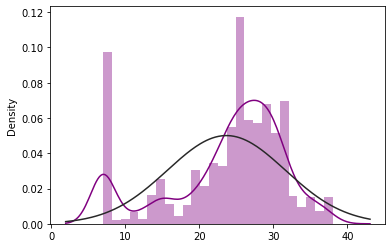

In [ ]:
relation_dict={'123':0,'132':0,'213':0,'231':0,'312':0,'321':0}
pairnum=[]
def pair_base(sequ,struc):
  pair_stack=[]
  pair_dict={'AU':0,'CG':0,'GU':0}
  for i in range(len(struc)):
    if struc[i]=='(':
      pair_stack.append(sequ[i])
    elif struc[i]==')':
      left=pair_stack.pop()
      right=sequ[i]
      order_pair= right+left if right<left else left+right
      pair_dict[order_pair]+=1
  pairnum.append(sum(pair_dict.values()))
  if pair_dict['AU']<=pair_dict['CG']:
    if pair_dict['GU']<=pair_dict['AU']:
      relation_dict['312']+=1
    elif pair_dict['GU']<=pair_dict['CG']:
      relation_dict['132']+=1
    else:
      relation_dict['123']+=1
  else:
    if pair_dict['GU']<=pair_dict['CG']:
      relation_dict['321']+=1
    elif pair_dict['GU']<=pair_dict['AU']:
      relation_dict['231']+=1
    else:
      relation_dict['213']+=1

  #pair_dict.update({k: pair_dict[k] for k in pair_dict.keys()})
  return pair_dict

pd.DataFrame.from_dict(train.apply(lambda x: pair_base(x.sequence,x.structure),axis=1))
#print(relation_dict)
sns.distplot(pairnum, bins='auto',fit=norm, color='purple')


In [ ]:
shapiro(pairnum)


(0.8963133096694946, 1.6546561413755498e-37)